In [1]:
get_ipython().run_cell_magic('capture', '', "%logstop\n%logstart -t -r -q ipython_command_log.py global\n\n#- IRONHACKS RESEARCH TRACKING CODE\n#----------------------------------\n# The following code is used to help our research team understand how you \n# our notebook environment. We do not collect any personal information with\n# the following code, it is used to measure when and how often you work on\n# your submission files.\n\nimport os\nfrom datetime import datetime\nimport IPython.core.history as history\n\nha = history.HistoryAccessor()\nha_tail = ha.get_tail(1)\nha_cmd = next(ha_tail)\nsession_id = str(ha_cmd[0])\ncommand_id = str(ha_cmd[1])\ntimestamp = datetime.utcnow().isoformat()\nhistory_line = ','.join([session_id, command_id, timestamp]) + '\\n'\nlogfile = open(os.environ['HOME']+'/ipython_session_log.csv', 'a')\nlogfile.write(history_line)\nlogfile.close()\n")

In [2]:
#import cell
import pandas as pd
import numpy as np
import statistics
import csv
import matplotlib.pyplot as plt
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics

In [3]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [4]:
#Gets the master unemployed table
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.unemployment_data`
"""

In [5]:
# QUERY THE DATA ONCE
query_job = bigquery_client.query(query)
unemploymentData = query_job.to_dataframe()
print(unemploymentData.shape)
pd.set_option('display.max_columns', None)
unemploymentData.head(3)

(16833, 25)


,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,top_category_employer1,top_category_employer2,top_category_employer3,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,<NA>,14,<NA>,0,31-33,51,62,<NA>,<NA>,0,0,0,11,0,0,<NA>,<NA>
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0,<NA>,108,<NA>,0,48-49,51,56,76,35,0,0,0,<NA>,<NA>,0,0,0
2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0,<NA>,<NA>,<NA>,0,56,N/A,N/A,<NA>,<NA>,0,0,0,39,0,0,0,0


In [6]:
#Gets each tracks mean and std dev
#unlist has the master unemployment list
#b becomes the filtered list
unList = unemploymentData.values.tolist()
b_set = set(tuple(x) for x in unList)
b = [ list(x) for x in b_set ]

In [7]:
uuid = []
#makes a list of the unique uuid
for x in b:
    if(uuid.count(x[0]) == 0):
        uuid.append(x[0])

In [8]:
#setup for extract        
values = []
export = []

In [9]:
#for each value make a list of each weeks claims
for y in uuid:
    temp = [y]
    for x in b:
        if (x[0] == y):
            temp.append(x[6])
    values.append(temp)

In [10]:
for x in values:
    name = x[0]
    mean = statistics.mean(x[1:])
    if (len(x) > 2):
        stdev = statistics.stdev(x[1:])
    else:
        print("short")
    export.append([name, mean, stdev])
#Everything below this is testing

In [11]:
#Make bar charts
#unique list as guide to count
x1 = []
y1 = []
for i in uuid[:1]:
    for k in b:
        if (k[0] == i):
            x1.append(k[2])
            y1.append(k[6])

<BarContainer object of 8 artists>

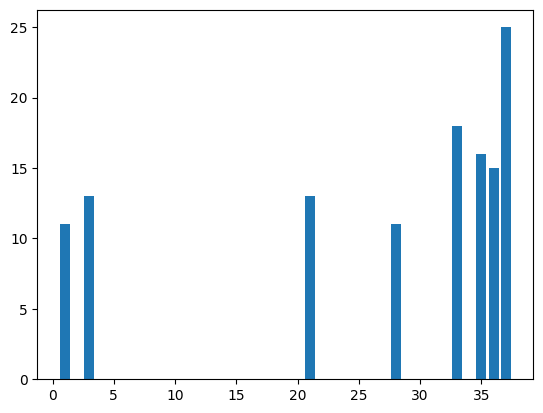

In [12]:
plt.bar(x1,y1)

Make bar charts
unique list as guide to count
num of unemployment claims versus count

In [13]:
xValues = []
xCount = []
for i in uuid[:1]:
    for k in b:
        if (k[0] == i):
            xValues.append(k[6])
c_set = set(tuple(x) for x in xValues)
c = [ list(x) for x in c_set ]

TypeError: 'int' object is not iterable

In [14]:
for x in c:
    xCount.append(xValues.count(x))

NameError: name 'c' is not defined

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (8,) and arg 1 with shape (0,).

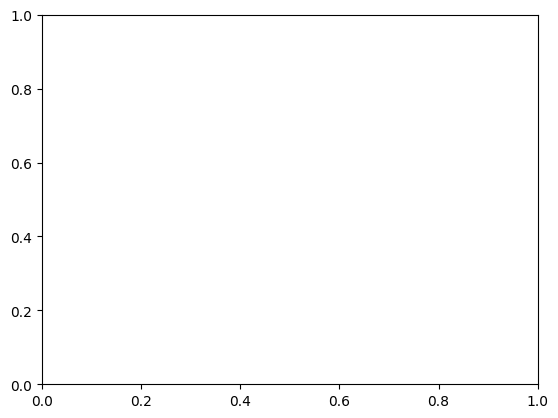

In [15]:
plt.bar(xValues,xCount)

Make bar charts
unique list as guide to count
num of unemployment claims versus count

In [16]:
xValues = []
xCount = []
for i in uuid[:1]:
    for k in b:
        if (k[0] == i):
            xValues.append(k[6])
c = list(dict.fromkeys(xValues))

In [17]:
for x in c:
    xCount.append(xValues.count(x))

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (8,) and arg 1 with shape (6,).

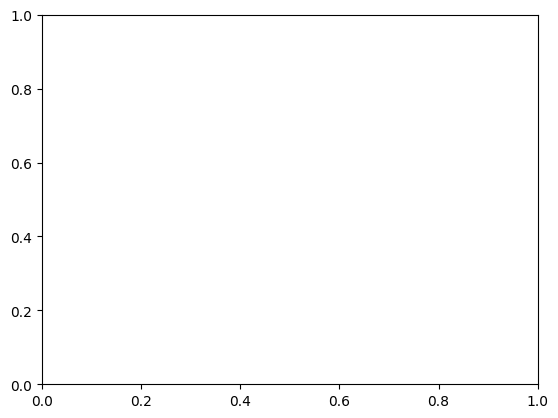

In [18]:
plt.bar(xValues,xCount)

Make bar charts
unique list as guide to count
num of unemployment claims versus count

In [19]:
xValues = []
xCount = []
for i in uuid[:1]:
    for k in b:
        if (k[0] == i):
            xValues.append(k[6])
c = list(dict.fromkeys(xValues))

[13, 25, 16, 15, 13, 18, 11, 11]
[2, 1, 1, 1, 1, 2]


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (8,) and arg 1 with shape (6,).

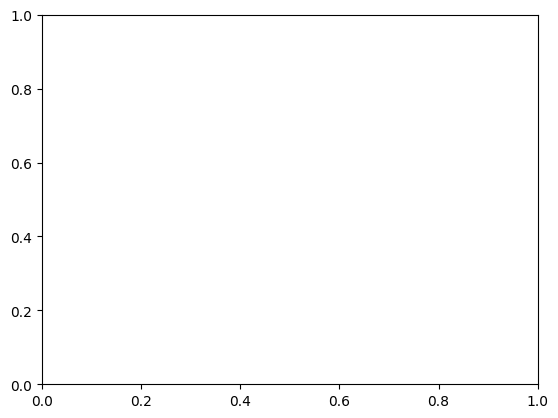

In [20]:
for x in c:
    xCount.append(xValues.count(x))
print(xValues)
print(xCount)
plt.bar(xValues,xCount)

Make bar charts
unique list as guide to count
num of unemployment claims versus count

In [21]:
xValues = []
xCount = []
for i in uuid[:1]:
    for k in b:
        if (k[0] == i):
            xValues.append(k[6])
c = list(dict.fromkeys(xValues))

[13, 25, 16, 15, 13, 18, 11, 11]
[2, 1, 1, 1, 1, 2]


<BarContainer object of 6 artists>

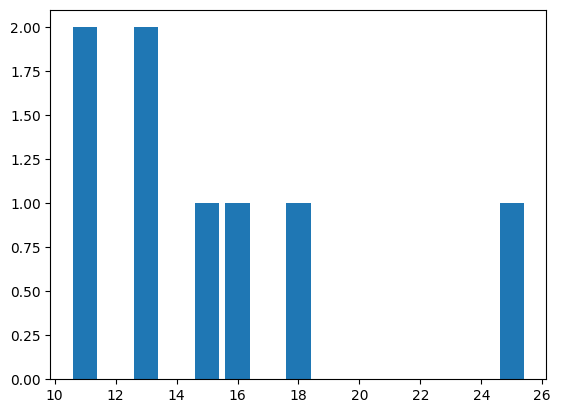

In [22]:
for x in c:
    xCount.append(xValues.count(x))
print(xValues)
print(xCount)
plt.bar(c,xCount)

Make bar charts
unique list as guide to count
num of unemployment claims versus count

In [23]:
xValues = []
xCount = []
for i in uuid[:1]:
    for k in b:
        if (k[0] == i):
            xValues.append(k[6])
c = list(dict.fromkeys(xValues))

8


<BarContainer object of 6 artists>

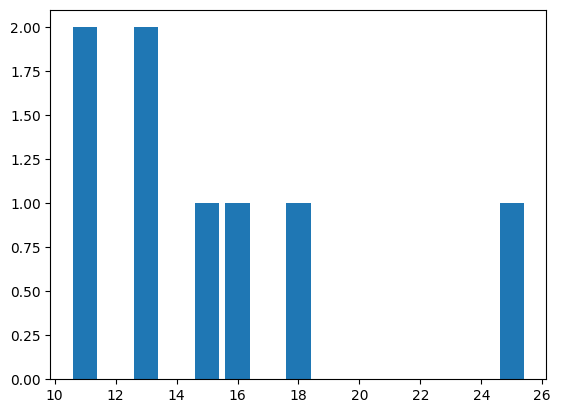

In [24]:
for x in c:
    xCount.append(xValues.count(x))
print(len(xValues))
plt.bar(c,xCount)

Make bar charts
unique list as guide to count
num of unemployment claims versus count

In [25]:
xValues = []
xCount = []
for i in uuid[:1]:
    for k in b:
        if (k[0] == i):
            xValues.append(k[6])
c = list(dict.fromkeys(xValues))

In [26]:
for x in c:
    xCount.append(xValues.count(x))
print(len(xValues))
print(statistics.mean(xxValues)
plt.bar(c,xCount)

SyntaxError: invalid syntax (62741380.py, line 5)

Make bar charts
unique list as guide to count
num of unemployment claims versus count

In [27]:
xValues = []
xCount = []
for i in uuid[:1]:
    for k in b:
        if (k[0] == i):
            xValues.append(k[6])
c = list(dict.fromkeys(xValues))

8
15.25


<BarContainer object of 6 artists>

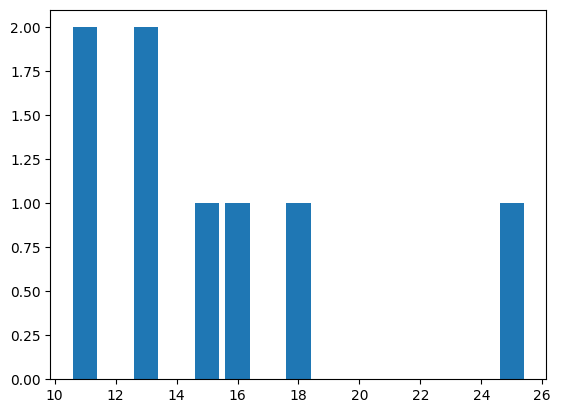

In [28]:
for x in c:
    xCount.append(xValues.count(x))
print(len(xValues))
print(statistics.mean(xValues))
plt.bar(c,xCount)

Make bar charts
unique list as guide to count
num of unemployment claims versus count

In [29]:
xValues = []
xCount = []
for i in uuid[:1]:
    for k in b:
        if (k[0] == i):
            xValues.append(k[6])
c = list(dict.fromkeys(xValues))

15.25
14.0


<BarContainer object of 6 artists>

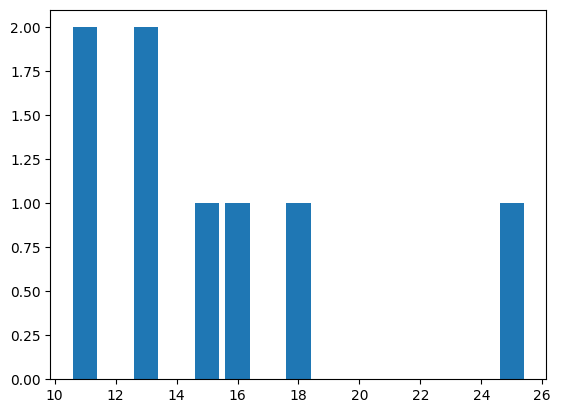

In [30]:
for x in c:
    xCount.append(xValues.count(x))
print(statistics.mean(xValues))
print(statistics.median(xValues))
plt.bar(c,xCount)

Make bar charts
unique list as guide to count
num of unemployment claims versus count

In [31]:
xValues = []
xCount = []
for i in uuid[4:5]:
    for k in b:
        if (k[0] == i):
            xValues.append(k[6])
c = list(dict.fromkeys(xValues))

27.636363636363637
27


<BarContainer object of 21 artists>

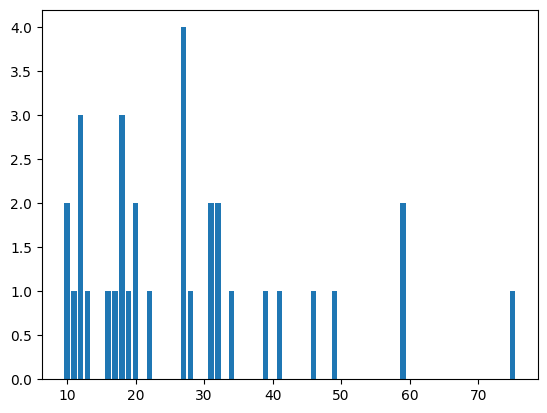

In [32]:
for x in c:
    xCount.append(xValues.count(x))
print(statistics.mean(xValues))
print(statistics.median(xValues))
plt.bar(c,xCount)

Make bar charts
unique list as guide to count
num of unemployment claims versus count

15.25
14.0
30.857142857142858
28.0


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (27,) and arg 1 with shape (33,).

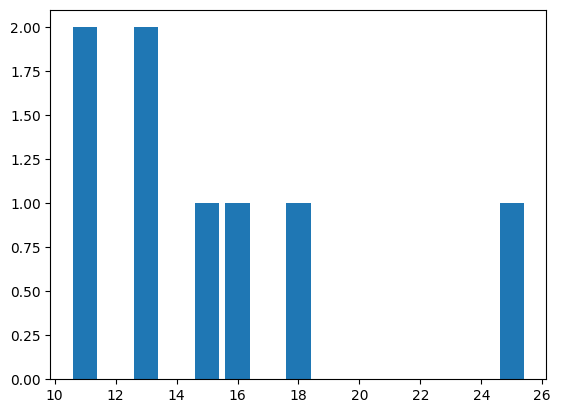

In [33]:
xValues = []
xCount = []
for i in uuid[:2]:
    for k in b:
        if (k[0] == i):
            xValues.append(k[6])
    c = list(dict.fromkeys(xValues))

    for x in c:
        xCount.append(xValues.count(x))
    print(statistics.mean(xValues))
    print(statistics.median(xValues))
    plt.bar(c,xCount)

Make bar charts
unique list as guide to count
num of unemployment claims versus count

15.25
14.0
34.529411764705884
32.5


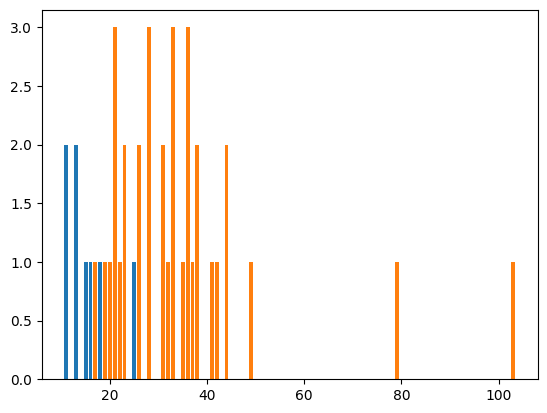

In [34]:
for i in uuid[:2]:
    xValues = []
    xCount = []
    for k in b:
        if (k[0] == i):
            xValues.append(k[6])
    c = list(dict.fromkeys(xValues))

    for x in c:
        xCount.append(xValues.count(x))
    print(statistics.mean(xValues))
    print(statistics.median(xValues))
    plt.bar(c,xCount)

Make bar charts
unique list as guide to count
num of unemployment claims versus count

15.25
14.0
34.529411764705884
32.5
34.61764705882353
30.0
14.555555555555555
12.5
27.636363636363637
27
22.885714285714286
21
24.916666666666668
19.0
23.2
20
17.352941176470587
15
19.696969696969695
14


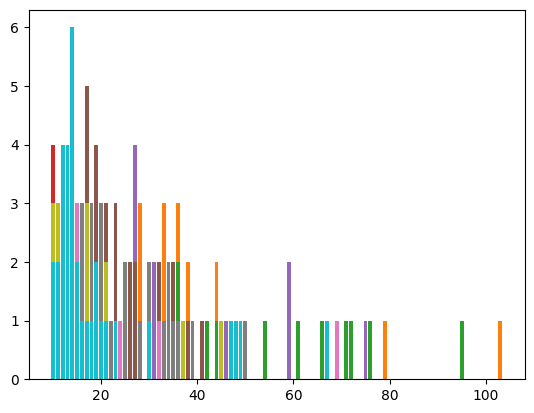

In [35]:
for i in uuid[:10]:
    xValues = []
    xCount = []
    for k in b:
        if (k[0] == i):
            xValues.append(k[6])
    c = list(dict.fromkeys(xValues))

    for x in c:
        xCount.append(xValues.count(x))
    print(statistics.mean(xValues))
    print(statistics.median(xValues))
    plt.bar(c,xCount)

Make bar charts
unique list as guide to count
num of unemployment claims versus count

15.25
14.0


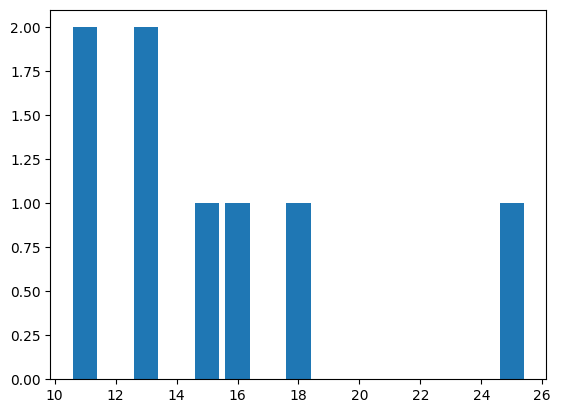

In [36]:
for i in uuid[:1]:
    xValues = []
    xCount = []
    for k in b:
        if (k[0] == i):
            xValues.append(k[6])
    c = list(dict.fromkeys(xValues))

    for x in c:
        xCount.append(xValues.count(x))
    print(statistics.mean(xValues))
    print(statistics.median(xValues))
    plt.bar(c,xCount)